In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-1980-2020/movies_1980_2020_30k.csv


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
movies_df = pd.read_csv('/kaggle/input/movies-dataset-1980-2020/movies_1980_2020_30k.csv')

# Display the first few rows of the dataset
movies_df.head()

,Title,Director,Genre,Release Date,Duration,Rating
0,Key entire popular.,Anthony Becker,Horror,1981-05-12,102,6.8
1,Gun husband reveal.,William Johnson,Documentary,2016-06-13,92,7.6
2,Crime cover.,Amy Le,Drama,1988-03-22,144,5.5
3,Challenge.,Andrea Martinez,Romance,2013-04-01,161,2.0
4,Close study.,Michael Rodgers,Fantasy,2012-10-18,177,3.7


In [3]:
# Inspect column names to ensure correct naming
print(movies_df.columns)

Index(['Title', 'Director', 'Genre', 'Release Date', 'Duration', 'Rating'], dtype='object')


In [4]:
# Dropping any rows with missing values (if any)
movies_df_cleaned = movies_df.dropna()

# Display the shape of the cleaned dataset
movies_df_cleaned.shape

(30000, 6)

In [5]:
# Ensure the 'Year' column is present and correctly typed
if 'Year' in movies_df_cleaned.columns:
    # Convert 'Year' to string type if it is not already
    movies_df_cleaned['Year'] = movies_df_cleaned['Year'].astype(int).astype(str)
    
    # Plotting the distribution of movies by year
    plt.figure(figsize=(12, 6))
    sns.countplot(data=movies_df_cleaned, x='Year', order=sorted(movies_df_cleaned['Year'].unique()))
    plt.title('Distribution of Movies by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'Year' not found in the dataset.")

Column 'Year' not found in the dataset.


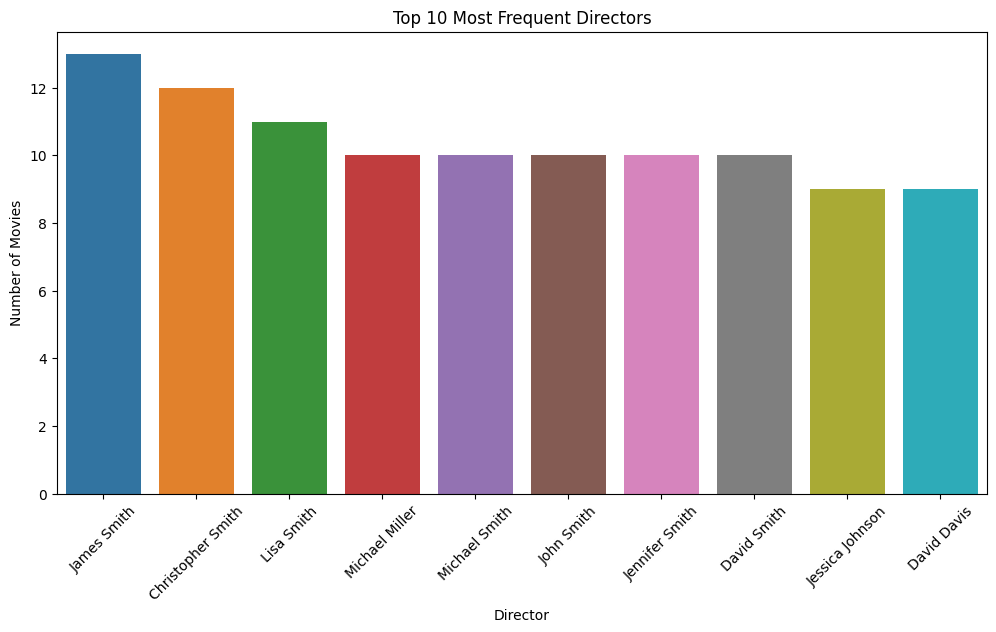

In [6]:
# Ensure that the 'Director' column is present
if 'Director' in movies_df_cleaned.columns:
    # Finding the most frequent directors
    top_directors = movies_df_cleaned['Director'].value_counts().head(10)

    # Plotting the most frequent directors
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_directors.index, y=top_directors.values)
    plt.title('Top 10 Most Frequent Directors')
    plt.xlabel('Director')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Director' not found in the dataset.")


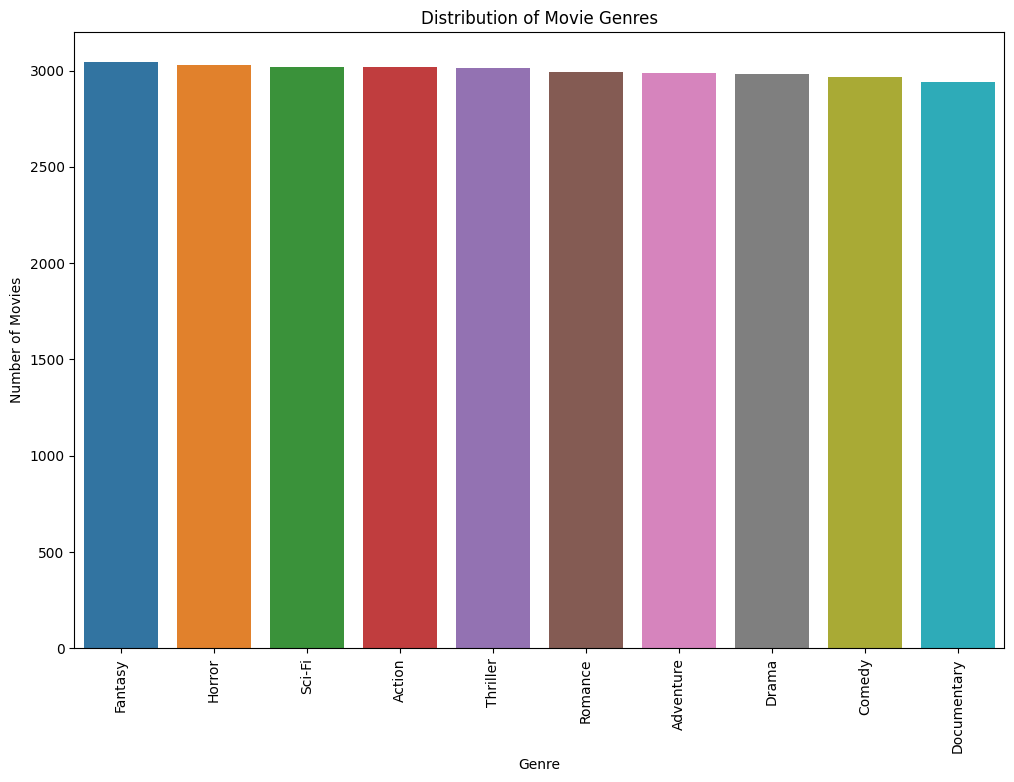

In [7]:
# Ensure that the 'Genre' column is present
if 'Genre' in movies_df_cleaned.columns:
    # Finding the most common genres
    genre_counts = movies_df_cleaned['Genre'].value_counts()

    # Plotting the distribution of genres
    plt.figure(figsize=(12, 8))
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.title('Distribution of Movie Genres')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'Genre' not found in the dataset.")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


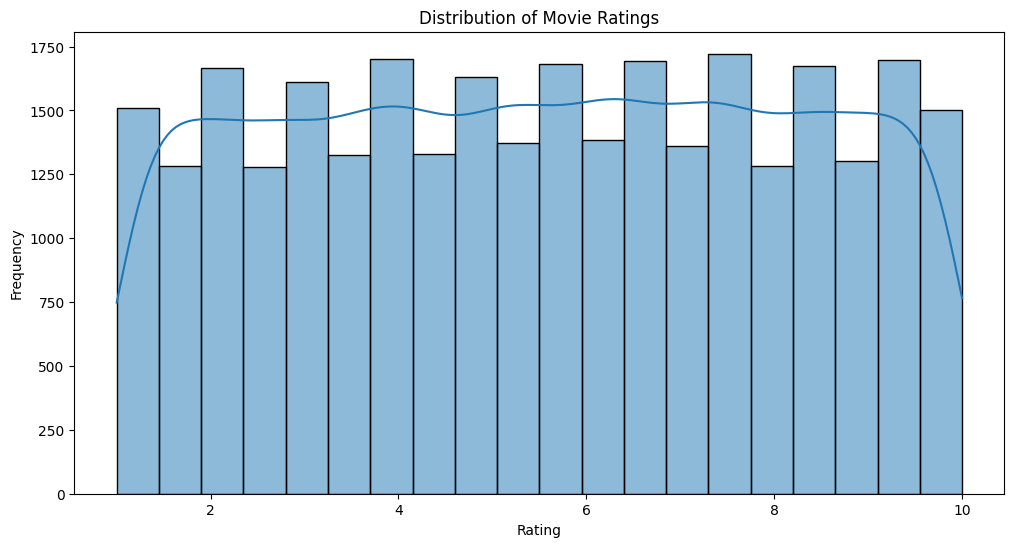

In [8]:
# Ensure that the 'Rating' column is present
if 'Rating' in movies_df_cleaned.columns:
    # Plotting the distribution of movie ratings
    plt.figure(figsize=(12, 6))
    sns.histplot(movies_df_cleaned['Rating'], bins=20, kde=True)
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Rating' not found in the dataset.")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


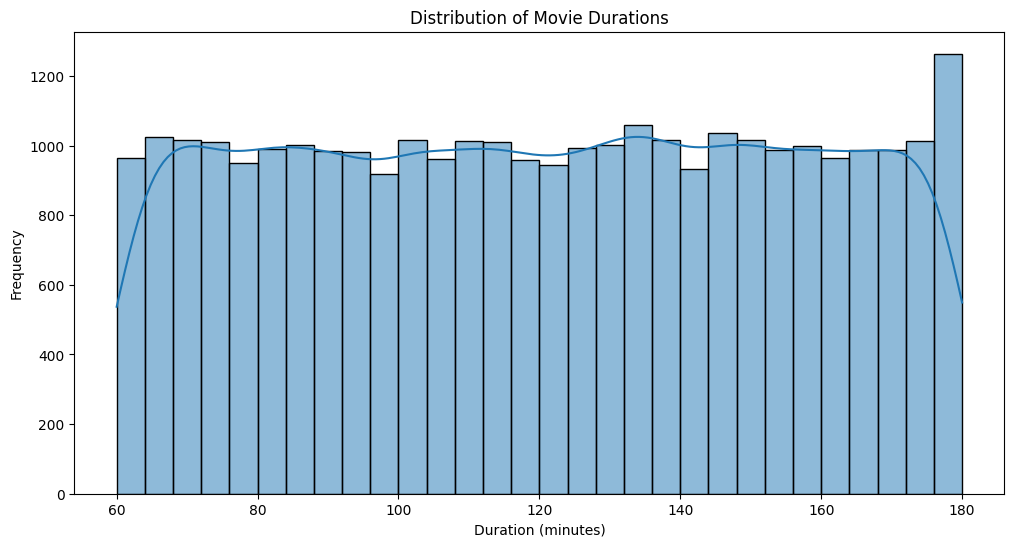

In [9]:
# Ensure that the 'Duration' column is present
if 'Duration' in movies_df_cleaned.columns:
    # Convert 'Duration' to numeric, errors='coerce' will convert non-numeric to NaN
    movies_df_cleaned['Duration'] = pd.to_numeric(movies_df_cleaned['Duration'], errors='coerce')
    
    # Dropping rows where 'Duration' is NaN
    movies_df_cleaned = movies_df_cleaned.dropna(subset=['Duration'])
    
    # Plotting the distribution of movie durations
    plt.figure(figsize=(12, 6))
    sns.histplot(movies_df_cleaned['Duration'], bins=30, kde=True)
    plt.title('Distribution of Movie Durations')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Duration' not found in the dataset.")


# Ensure 'Duration' and 'Rating' columns are present
if 'Duration' in movies_df_cleaned.columns and 'Rating' in movies_df_cleaned.columns:
    # Plotting the relationship between movie duration and rating
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=movies_df_cleaned, x='Duration', y='Rating', alpha=0.5)
    plt.title('Relationship Between Movie Duration and Rating')
    plt.xlabel('Duration (minutes)')
    plt.ylabel('Rating')
    plt.show()
else:
    print("Columns 'Duration' and/or 'Rating' not found in the dataset.")
